In [66]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import datetime as dt

In [67]:
df = pd.read_csv("Resources/producing_percent.csv")
df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.500000
1,8844,1995-12-15,0.000000
2,31357,1995-12-22,0.500000
3,11862,1995-02-10,1.000000
4,949,1995-12-15,0.200000
...,...,...,...
15761,45527,2010-01-01,0.222222
15762,14885,2005-09-13,0.000000
15763,390959,2000-10-22,0.500000
15764,222848,1995-01-01,0.000000


In [68]:
# convert release date to useful format
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']=df['release_date'].map(dt.datetime.toordinal)

In [69]:
df.dtypes

movie_id            int64
release_date        int64
percent_female    float64
dtype: object

In [70]:
count_df = df.groupby(['release_date'])['percent_female'].sum()

In [71]:
count_df


release_date
711858    0.0
711861    0.0
711870    0.0
711875    0.0
711876    0.0
         ... 
736694    0.0
736809    0.0
737005    0.0
737059    0.0
737775    0.0
Name: percent_female, Length: 8719, dtype: float64

In [72]:
dataframe = count_df.to_frame()

DONT RERUN

In [73]:
dataframe = dataframe.rename_axis('release_date').reset_index()

In [74]:
dataframe

,release_date,percent_female
0,711858,0.0
1,711861,0.0
2,711870,0.0
3,711875,0.0
4,711876,0.0
...,...,...
8714,736694,0.0
8715,736809,0.0
8716,737005,0.0
8717,737059,0.0


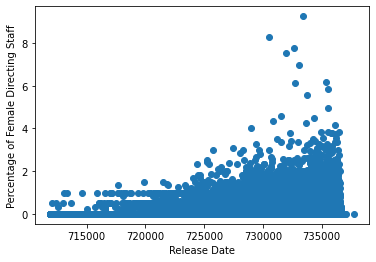

In [75]:
plt.scatter(dataframe.release_date, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [76]:
X = dataframe.release_date.values.reshape(-1, 1)

In [77]:
X

array([[711858],
       [711861],
       [711870],
       ...,
       [737005],
       [737059],
       [737775]], dtype=int64)

In [78]:
X.shape

(8719, 1)

In [79]:
y = dataframe.percent_female
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8714    0.0
8715    0.0
8716    0.0
8717    0.0
8718    0.0
Name: percent_female, Length: 8719, dtype: float64

In [80]:
len(X)

8719

In [81]:
len(y)

8719

In [82]:
model = LinearRegression()

In [83]:
model.fit(X, y)

LinearRegression()

In [84]:
y_pred = model.predict(X)
print(y_pred.shape)

(8719,)


In [85]:
len(y_pred)

8719

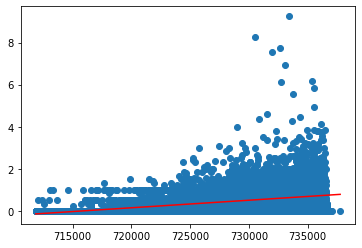

In [86]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [87]:
print(model.coef_)
print(model.intercept_)

[3.5859565e-05]
-25.667812652246926
